In [1]:
from dgpsi import dgp, kernel, combine, lgp, path, emulator
import numpy as np
import matplotlib.pyplot as plt

This is a simple showcase on how to use DGP to model multi-outputs by setting multiple GP nodes in the final layer instead of training multiple DGP models to each output.

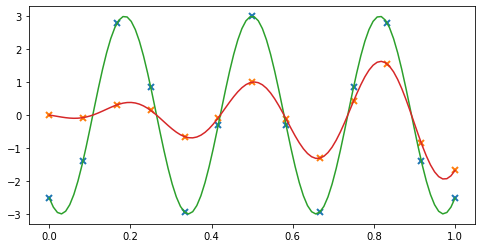

In [2]:
X = np.linspace(0,1,13).reshape(-1,1)
Y1 = 3*np.cos(20*X-10)
Y2 = 2*X*np.cos(20*X-10) 
z = np.linspace(0,1,100).reshape(-1,1)
plt.figure(figsize=(8, 4))
plt.plot(X, Y1, "x", mew=2)
_ = plt.plot(X, Y2, "x", mew=2)
plt.plot(z,3*np.cos(20*z-10))
plt.plot(z,2*z*np.cos(20*z-10))

In [12]:
#Construct a 2-layered DGP with the first layer containing one GP node and the second layer containing two GP nodes, each of which corresponds to one output
layer1=[kernel(length=np.array([.5]),name='sexp')]
layer2=[kernel(length=np.array([.5]),name='sexp',connect=np.arange(1),scale_est=True),kernel(length=np.array([.5]),name='sexp',connect=np.arange(1),scale_est=True)]
all_layer=combine(layer1,layer2)

In [13]:
#Train the model
Y=np.concatenate((Y1,Y2),1)
m=dgp(X,[Y],all_layer)
m.train(N=500)

Iteration 500: Layer 2: 100%|██████████| 500/500 [00:12<00:00, 39.44it/s]


In [15]:
#Construct the emulator
final_layer_obj=m.estimate()
emu=emulator(final_layer_obj)

In [16]:
#Make predictions
mu,var=emu.predict(z, method='mean_var')

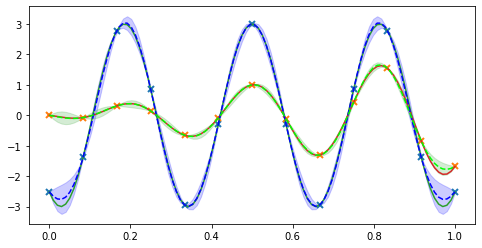

In [17]:
#Draw predictions
plt.figure(figsize=(8, 4))
plt.plot(X, Y1, "x", mew=2)
_ = plt.plot(X, Y2, "x", mew=2)
plt.plot(z,3*np.cos(20*z-10))
plt.plot(z,2*z*np.cos(20*z-10))
s1=np.sqrt(var[:,0])
u1=mu[:,0]+2*s1
l1=mu[:,0]-2*s1
s2=np.sqrt(var[:,1])
u2=mu[:,1]+2*s2
l2=mu[:,1]-2*s2
p=plt.plot(z,mu[:,0],'--',color='blue',alpha=1,lw=1.5)
p=plt.plot(z,mu[:,1],'--',color='lime',alpha=1,lw=1.5)
plt.fill_between(z.flatten(), l1.flatten(), u1.flatten(), color='blue', alpha=0.2)
plt.fill_between(z.flatten(), l2.flatten(), u2.flatten(), color='tab:green', alpha=0.2)